# Proyek Analisis Data: Air Quality Tiantan
- **Nama:** Yohanes Ardian Dogma K
- **Email:** yohanesardiandk@gmail.com
- **ID Dicoding:** ardi93

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara di Tiantan dari tahun ke tahun?
- Darimana arah manakah, angin yang membawa polusi ke kota Tiandi?
- Bagaimana korelasi yang terjadi antara polutan yang sedang terjadi?
- Apakah kondisi dari suatu cuaca mempengaruhi polusi yang terjadi di setiap tahunnya?
- Apakah kondisi polusi udara di kota tiandi terjadi karena terbawa oleh arus angin?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## Data Wrangling

### Gathering Data

In [14]:
tiantan_df = pd.read_csv("./data/PRSA_Data_Tiantan_20130301-20170228.csv").drop(['No'], axis = 1)
tiantan_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


### Assessing Data

In [15]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam customers_df
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34387 non-null  float64
 5   PM10     34467 non-null  float64
 6   SO2      33946 non-null  float64
 7   NO2      34320 non-null  float64
 8   CO       33938 non-null  float64
 9   O3       34221 non-null  float64
 10  TEMP     35044 non-null  float64
 11  PRES     35044 non-null  float64
 12  DEWP     35044 non-null  float64
 13  RAIN     35044 non-null  float64
 14  wd       34986 non-null  object 
 15  WSPM     35050 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.5+ MB


In [16]:
# Menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom
tiantan_df.isna().sum()

year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [17]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
# Menampilkan ringkasan parameter statistik 
tiantan_df.describe(include="all")

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,34986,35050.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064,NaN
mean,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,NaN,1.860785,NaN,2015-03-01 11:30:00
min,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN,2014-03-01 05:45:00
50%,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN,2015-03-01 11:30:00
75%,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN,2016-02-29 17:15:00
max,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN,2017-02-28 23:00:00


In [26]:
# Define a function to combine year, month, day, and hour into a datetime column
def combine_datetime(tiantan_df):
    tiantan_df['datetime'] = pd.to_datetime(tiantan_df[['year', 'month', 'day', 'hour']])
    tiantan_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return tiantan_df

In [27]:
tiantan_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000,35064
mean,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785,2015-03-01 11:30:00
min,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000,2014-03-01 05:45:00
50%,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000,2015-03-01 11:30:00
75%,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000,2016-02-29 17:15:00
max,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000,2017-02-28 23:00:00
std,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368,NaN


### Cleaning Data

In [32]:
# Menggunakan Data Rata-Rata (MEAN) untuk mengisi cell kosong
tiantan_df['PM2.5'] = tiantan_df['PM2.5'].fillna(value=82.164911)
tiantan_df['PM10'] = tiantan_df['PM10'].fillna(value=106.363672)
tiantan_df['SO2'] = tiantan_df['SO2'].fillna(value=14.367615)
tiantan_df['NO2'] = tiantan_df['NO2'].fillna(value=53.162646)
tiantan_df['CO'] = tiantan_df['CO'].fillna(value=1298.303318)
tiantan_df['O3'] = tiantan_df['O3'].fillna(value=55.984297)
tiantan_df['TEMP'] = tiantan_df['TEMP'].fillna(value=13.671490)
tiantan_df['PRES'] = tiantan_df['PRES'].fillna(value=1012.547419)
tiantan_df['DEWP'] = tiantan_df['DEWP'].fillna(value=-2.447535)
tiantan_df['RAIN'] = tiantan_df['RAIN'].fillna(value=0.064020)
tiantan_df['WSPM'] = tiantan_df['WSPM'].fillna(value=1.860785)
# Menggunakan Data Teratas (TOP) untuk mengisi cell kosong
tiantan_df['wd'] = tiantan_df['wd'].fillna(value="ENE")

In [33]:
# Menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom 
tiantan_df.isna().sum()

PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
Category    0
dtype: int64

In [34]:
tiantan_df.mean(numeric_only=True)

PM2.5      82.164911
PM10      106.363672
SO2        14.367615
NO2        53.162646
CO       1298.303318
O3         55.984297
TEMP       13.671490
PRES     1012.547419
DEWP        2.444742
RAIN        0.064020
WSPM        1.860785
dtype: float64

## Exploratory Data Analysis (EDA)

In [35]:
# Define the ranges and AQI (Air Quality Index) upper bounds
category_ranges = [
    'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'
]
pm25_ranges = [12, 35.4, 150.4, 250.4, float('inf')]
pm10_ranges = [54, 154, 254, 354, 424, float('inf')]
so2_ranges = [35, 75, 185, 304, 604, float('inf')]
no2_ranges = [53, 100, 360, 649, 1249, float('inf')]
co_ranges = [4400, 9400, 12400, 15400, 30400, float('inf')]
o3_ranges = [54, 70, 85, 105, 200, float('inf')]

# Define a function to categorize a value based on the given ranges
def categorize(value, ranges):
    for max_val in ranges:
        if value <= max_val:
            return ranges.index(max_val)

# Create a new column 'Category' by applying the categorize function to each row
tiantan_df['Category'] = tiantan_df.apply(lambda row: category_ranges[max(
    categorize(row['PM2.5'], pm25_ranges),
    categorize(row['PM10'], pm10_ranges),
    categorize(row['SO2'], so2_ranges),
    categorize(row['NO2'], no2_ranges),
    categorize(row['CO'], co_ranges),
    categorize(row['O3'], o3_ranges),
)], axis=1)

In [36]:
tiantan_df.sample(5)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Category
34371,97.0,108.0,31.0,32.0,1300.0,47.0,-1.7,1026.8,-25.0,0.0,WSW,2.2,Tiantan,2017-01-31 03:00:00,Unhealthy for Sensitive Groups
9399,65.0,73.0,50.0,69.0,1300.0,16.0,14.6,1006.5,3.7,0.0,NNE,0.8,Tiantan,2014-03-27 15:00:00,Unhealthy for Sensitive Groups
9547,109.0,162.0,29.0,38.0,1000.0,112.0,15.2,1016.0,2.4,0.0,E,1.4,Tiantan,2014-04-02 19:00:00,Very Unhealthy
14520,8.0,8.0,2.0,44.0,300.0,41.0,7.1,1027.6,-8.9,0.0,NE,1.3,Tiantan,2014-10-27 00:00:00,Good
22089,22.0,37.0,4.0,54.0,700.0,21.0,22.4,1010.3,15.0,0.0,NNE,2.0,Tiantan,2015-09-07 09:00:00,Moderate


In [37]:
tiantan_df.describe(include="all")

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Category
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan,NaN,Unhealthy for Sensitive Groups
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064,NaN,14282
mean,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.67149,1012.547419,2.444742,0.064020,NaN,1.860785,NaN,2015-03-01 11:30:00,NaN
min,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.80000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00,NaN
25%,23.000000,41.000000,3.000000,29.000000,600.000000,8.000000,3.10000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN,2014-03-01 05:45:00,NaN
50%,60.000000,87.000000,7.000000,48.000000,1000.000000,42.000000,14.60000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN,2015-03-01 11:30:00,NaN
75%,112.000000,143.000000,16.000000,70.000000,1600.000000,79.000000,23.50000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN,2016-02-29 17:15:00,NaN
max,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.10000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN,2017-02-28 23:00:00,NaN


In [38]:
tiantan_df.index = pd.to_datetime(tiantan_df['datetime'],format='%m/%d/%y %I:%M%p')
tiantan_df.groupby(by=[tiantan_df.index.year, tiantan_df.index.month]).agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"],
    "NO2": ["max", "min", "mean", "std"],
    "CO": ["max", "min", "mean", "std"],
    "O3": ["max", "min", "mean", "std"],
})

PM2.5                                PM10        \
                     max  min        mean         std    max   min   
datetime datetime                                                    
2013     3         498.0  3.0  105.655235   91.613714  839.0   2.0   
         4         264.0  3.0   60.628465   53.259089  304.0   3.0   
         5         326.0  3.0   80.367157   53.111774  691.0   9.0   
         6         525.0  3.0  110.472909   77.040381  641.0   3.0   
         7         250.0  3.0   69.388663   51.259466  304.0   2.0   
         8         283.0  3.0   64.237903   51.029125  284.0   2.0   
         9         302.0  3.0   80.570590   61.584446  369.0   2.0   
         10        372.0  3.0   95.119845   85.769622  404.0   3.0   
         11        347.0  3.0   80.386111   80.799953  491.0   6.0   
         12        395.0  3.0   85.126344   92.699881  472.0   2.0   
2014     1         539.0  3.0   98.457390   91.308658  608.0   6.0   
         2         541.0  3.0  136.389526  118.498001  561.0   5.0   
         3         386.0  3.0   93.988347   83.340543  697.0   5.0   
         4         263.0  3.0   84.998826   51.075625  894.0   5.0   
         5         277.0  3.0   66.612047   45.947333  482.0   3.0   
         6         249.0  3.0   61.037242   44.055637  293.0   5.0   
         7         278.0  3.0   92.104603   68.538075  364.0   5.0   
         8         203.0  3.0   66.286811   43.950773  230.0   5.0   
         9         264.0  3.0   68.171277   46.511488  264.0   5.0   
         10        381.0  3.0  113.974835   91.860819  410.0   3.0   
         11        456.0  3.0   87.957159   90.337484  623.0   5.0   
         12        347.0  3.0   70.648184   74.850437  519.0   5.0   
2015     1         518.0  3.0  101.808635   96.230274  518.0   5.0   
         2         359.0  3.0   96.451629   89.146242  642.0   6.0   
         3         348.0  3.0   87.960899   72.586199  887.0   5.0   
         4         306.0  3.0   72.666394   51.533774  574.0   5.0   
         5         238.0  3.0   54.014092   41.542503  471.0  11.0   
         6         292.0  3.0   62.412929   55.440040  299.0   5.0   
         7         206.0  3.0   65.560663   40.360375  347.0   5.0   
         8         165.0  3.0   49.334607   36.932371  262.0   5.0   
         9         214.0  3.0   49.457602   45.200279  223.0   5.0   
         10        345.0  3.0   72.343629   87.538251  345.0   3.0   
         11        671.0  3.0  121.837929  108.417943  671.0   3.0   
         12        641.0  3.0  157.920227  146.950225  641.0   5.0   
2016     1         519.0  3.0   71.447123   77.468336  519.0   7.0   
         2         821.0  3.0   45.036630   80.292512  988.0   5.0   
         3         370.0  3.0   89.783795   91.502328  893.0   3.0   
         4         279.0  3.0   66.162885   51.402589  641.0   6.0   
         5         299.0  3.0   49.469072   39.503476  728.0   3.0   
         6         214.0  3.0   63.322193   39.380155  452.0   5.0   
         7         268.0  3.0   71.018581   45.674296  268.0   5.0   
         8         162.0  3.0   49.076141   33.835319  162.0   5.0   
         9         235.0  3.0   57.484191   50.830034  235.0   6.0   
         10        343.0  3.0   80.148057   64.443257  343.0   3.0   
         11        330.0  3.0   99.810180   79.007713  470.0   6.0   
         12        485.0  3.0  143.492822  127.387355  594.0   6.0   
2017     1         808.0  3.0  121.488347  134.577120  899.0   5.0   
         2         375.0  3.0   72.291374   81.455797  416.0   5.0   

                                             SO2          ...        NO2  \
                         mean         std    max     min  ...       mean   
datetime datetime                                         ...              
2013     3         122.356305   99.338316  161.0  3.0000  ...  63.788058   
         4          90.497349   56.948140  116.0  2.5704  ...  43.595457   
         5         138.206623   78.494369  160.0  3.0000  ...  43.07

In [39]:
#menghitung korelasi antar feature dalam sebuah DataFrame
tiantan_df.corr(numeric_only = True)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.889791,0.392483,0.654249,0.786023,-0.165975,-0.150038,0.007196,0.111245,-0.014904,-0.287640
PM10,0.889791,1.000000,0.387506,0.617446,0.706908,-0.116944,-0.118927,-0.022081,0.058498,-0.027644,-0.178408
SO2,0.392483,0.387506,1.000000,0.406193,0.398966,-0.047650,-0.219087,0.151274,-0.218145,-0.038158,-0.038441
NO2,0.654249,0.617446,0.406193,1.000000,0.700122,-0.535742,-0.316918,0.180636,-0.078925,-0.047178,-0.407930
CO,0.786023,0.706908,0.398966,0.700122,1.000000,-0.313718,-0.313296,0.148633,-0.034384,-0.013439,-0.321367
O3,-0.165975,-0.116944,-0.047650,-0.535742,-0.313718,1.000000,0.571942,-0.423134,0.273301,0.018230,0.330393
TEMP,-0.150038,-0.118927,-0.219087,-0.316918,-0.313296,0.571942,1.000000,-0.837480,0.819041,0.038660,0.048829
PRES,0.007196,-0.022081,0.151274,0.180636,0.148633,-0.423134,-0.837480,1.000000,-0.770277,-0.065779,0.038493
DEWP,0.111245,0.058498,-0.218145,-0.078925,-0.034384,0.273301,0.819041,-0.770277,1.000000,0.089353,-0.278928
RAIN,-0.014904,-0.027644,-0.038158,-0.047178,-0.013439,0.018230,0.038660,-0.065779,0.089353,1.000000,0.025547


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara di Tiandi dari tahun ke tahun?

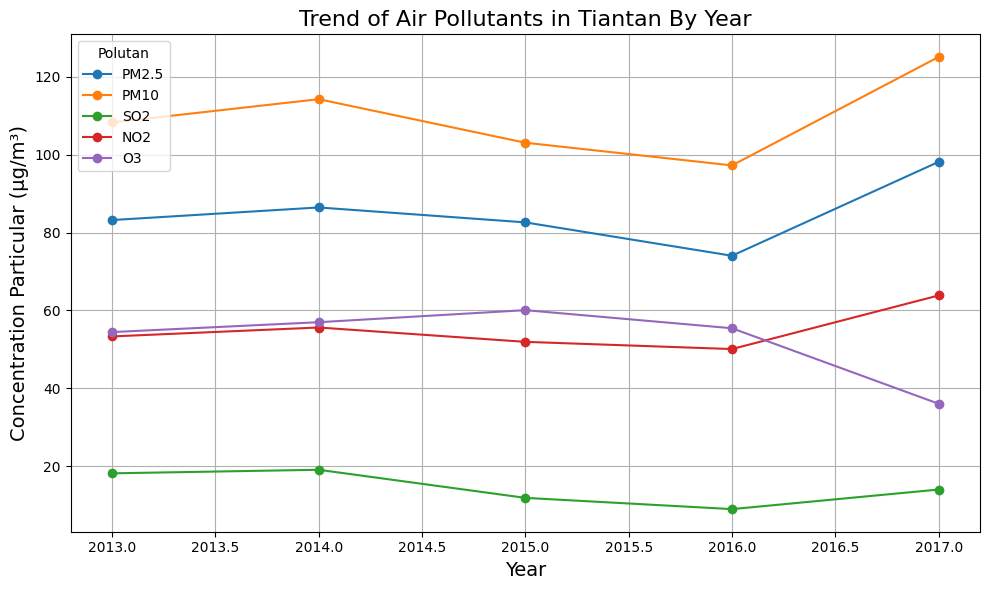

In [40]:
polutan_tiandi = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']
groupByYear = tiantan_df.groupby(tiantan_df.index.year)[polutan_tiandi].mean(numeric_only=True)
plt.figure(figsize=(10,6))
for polutan in polutan_tiandi:
    plt.plot(groupByYear.index, groupByYear[polutan], marker='o', label=polutan)
plt.title("Trend of Air Pollutants in Tiantan By Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Concentration Particular (µg/m³)", fontsize=14)
plt.legend(title="Polutan")
plt.grid(True)
plt.tight_layout()
plt.show()

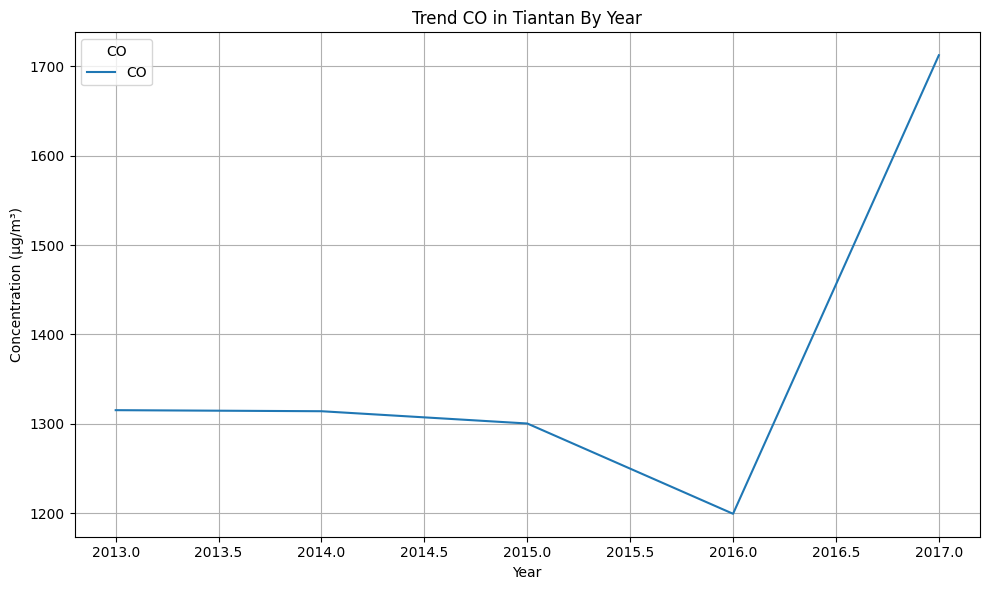

In [41]:
# Concentration CO
groupByYear = tiantan_df.groupby(tiantan_df.index.year).mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(groupByYear.index, groupByYear["CO"], label="CO")
plt.xlabel("Year")
plt.ylabel("Concentration (µg/m³)")
plt.title("Trend CO in Tiantan By Year")
plt.legend(title="CO")
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# Create a table of category counts per station
category_counts = pd.crosstab(tiantan_df.index.year, tiantan_df['Category'])

# Reorder the columns based on the custom order
category_counts[category_ranges]

Category,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous
row_0,,,,,,
2013,376,1227,3104,1241,1108,288
2014,380,1457,3728,1338,1421,436
2015,445,1515,3274,1458,1576,492
2016,432,1860,3576,1232,1300,384
2017,76,333,600,260,88,59


In [43]:
print(category_counts)

Category  Good  Hazardous  Moderate  Unhealthy  \
row_0                                            
2013       376        288      1227       1241   
2014       380        436      1457       1338   
2015       445        492      1515       1458   
2016       432        384      1860       1232   
2017        76         59       333        260   

Category  Unhealthy for Sensitive Groups  Very Unhealthy  
row_0                                                     
2013                                3104            1108  
2014                                3728            1421  
2015                                3274            1576  
2016                                3576            1300  
2017                                 600              88  


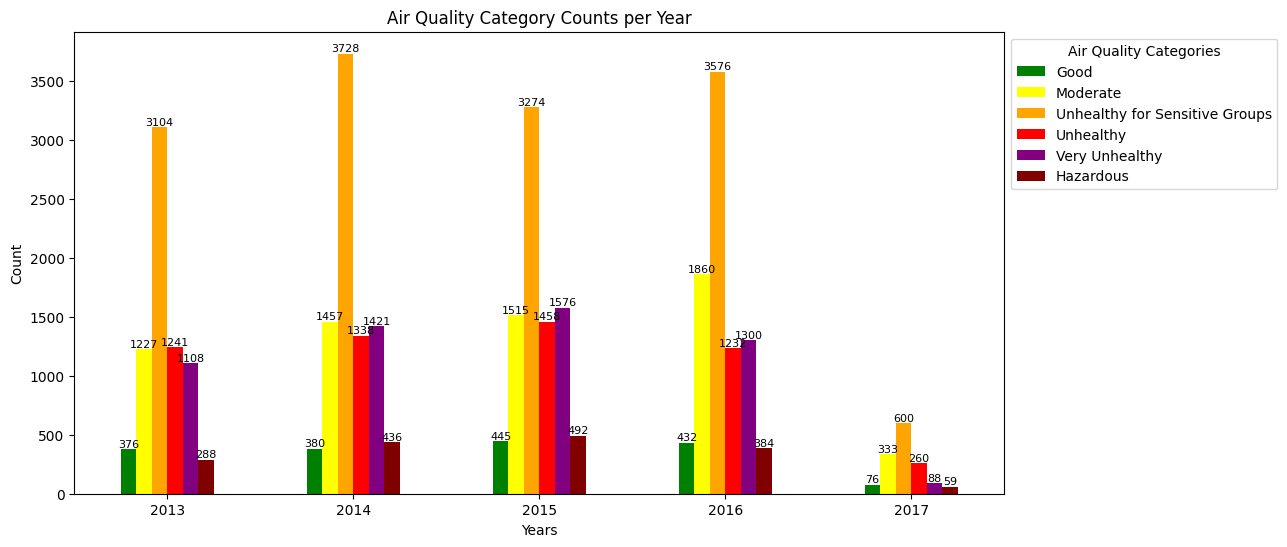

In [65]:
#Grouped bar chart with labels
custom_colors = ['#008000', '#FFFF00', '#ffA500', '#ff0000', '#800080', '#800000']
category_counts[category_ranges].plot(kind='bar', figsize=(12, 6), color=custom_colors)
plt.title('Air Quality Category Counts per Year')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Air Quality Categories', loc='upper left', bbox_to_anchor=(1, 1))

# Adding labels to each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.show()


Bagan batang bertumpuk menunjukkan kategori indeks kualitas udara (AQI) untuk pemantauan tahunan. AQI biasanya digunakan untuk menilai kualitas udara dan dampaknya terhadap kesehatan.

Data menunjukkan kategori udara di tahun 2013, 2014, 2015, dan 2016 memliki kualitas udara yang tergolong tidak sehat. Kategori kelompok sensitif tersebut sangat beresiko untuk orang dengan penyakit jantung atau paru-paru, orang dewasa yang lebih tua, anak-anak dan remaja, orang hamil, dan mereka yang berolahraga atau bekerja di luar ruangan.

Hasil pemantauan ini tampaknya mengalami berbagai macam kondisi kualitas udara, dengan episode kualitas udara buruk yang termasuk dalam kategori "Berbahaya" dan "Sangat Tidak Sehat". Data ini dapat berguna untuk memahami risiko kesehatan yang terkait dengan polusi udara dan untuk membuat keputusan mengenai kesehatan publik dan kebijakan lingkungan.

### Pertanyaan 2 : Bagaimana korelasi yang terjadi antara polutan yang sedang terjadi?

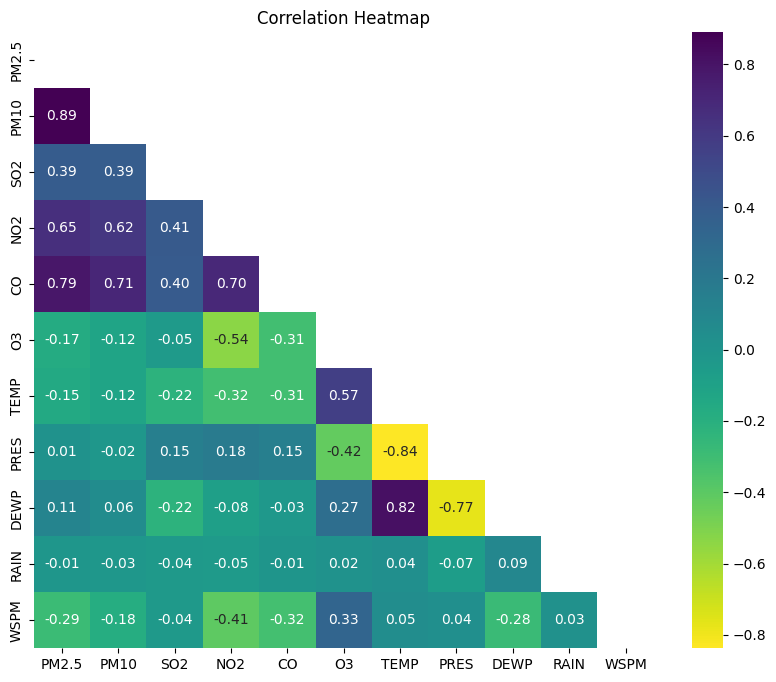

In [55]:
correlation_tiantan_data = tiantan_df.corr(numeric_only=True)

# Create a mask to hide the upper triangular part of the table
mask = np.triu(np.ones_like(correlation_tiantan_data, dtype=bool))

# Create a custom color map for shading
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create a heatmap with shading
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_tiantan_data, annot=True, fmt=".2f", cmap=plt.cm.viridis_r, mask=mask)

plt.title("Correlation Heatmap")
plt.show()

Peta panas menunjukkan korelasi antara berbagai variabel kualitas udara dan cuaca.

Berikut ini beberapa wawasan yang dapat diperoleh dari korelasi tersebut:
Setiap sel dalam tabel menunjukkan korelasi antara dua variabel. Nilainya berada dalam kisaran -1 hingga 1.. 1 menunjukkan korelasi positif sempurna. -1 menunjukkan korelasi negatif sempurna. 0 menunjukkan tidak ada korelasi.

1. PM2,5 dan PM10 sangat berkorelasi.
PM10 dan PM2.5 sering kali berasal dari sumber emisi yang berbeda, dan juga memiliki komposisi kimia yang berbeda. Emisi dari pembakaran bensin, minyak, bahan bakar diesel atau kayu menghasilkan banyak polusi PM2.5 yang ditemukan di udara luar ruangan, serta proporsi yang signifikan dari PM10. PM10 juga mencakup debu dari lokasi konstruksi, tempat pembuangan sampah dan pertanian, kebakaran hutan dan pembakaran semak/sampah, sumber industri, debu yang tertiup angin dari lahan terbuka, serbuk sari dan fragmen bakteri.

3. Tingkat PM2,5 yang tinggi dikaitkan dengan tingkat SO2, NO2, dan CO yang tinggi, yang dapat menjadi indikasi kualitas udara yang buruk.

4. TEMP dan DEWP sangat berkorelasi. Saat tekanan menurun, suhu cenderung meningkat, dan titik embun cenderung menurun.

5. Korelasi ozon (O3) dan TEMP, Ozon di permukaan tanah terbentuk ketika nitrogen oksida(NOx) dan senyawa organik volatil bereaksi satu sama lain di bawah sinar matahari dan suhu panas. Polusi ini berasal dari kendaraan, industri, dan sumber lain serta berkontribusi terhadap pembentukan kabut asap. Hal tersebut menyebabkan temperatur menjadi lebih panas.

3. Korelasi antara Nitrogen dioksida (NO2) dan karbon monoksida (CO) dapat bereaksi menghasilkan nitrogen monoksida (NO).

4. Kecepatan angin yang lebih tinggi (WSPM) dikaitkan dengan kadar PM2.5, PM10, SO2, NO2, dan CO yang lebih rendah, yang dapat membantu menyebarkan polutan udara.

5. HUJAN memiliki korelasi yang lemah dengan sebagian besar variabel, yang menunjukkan bahwa curah hujan mungkin tidak memiliki pengaruh yang kuat pada variabel kualitas udara dan cuaca ini.

Wawasan ini memberikan pemahaman yang lebih baik tentang bagaimana kualitas udara dan parameter cuaca yang berbeda saling terkait, yang dapat berharga untuk menilai kualitas udara dan membuat prediksi. Misalnya, korelasi yang kuat antara PM2.5 dan PM10 menunjukkan bahwa pengukuran ini dapat digunakan secara bergantian dalam beberapa kasus, sementara korelasi negatif antara ozon dan polutan lainnya dapat menunjukkan efektivitas ozon dalam mengurangi tingkat polusi melalui reaksi kimia.

### Pertanyaan 3:  Apakah kondisi dari suatu cuaca mempengaruhi polusi yang terjadi di setiap tahunnya?

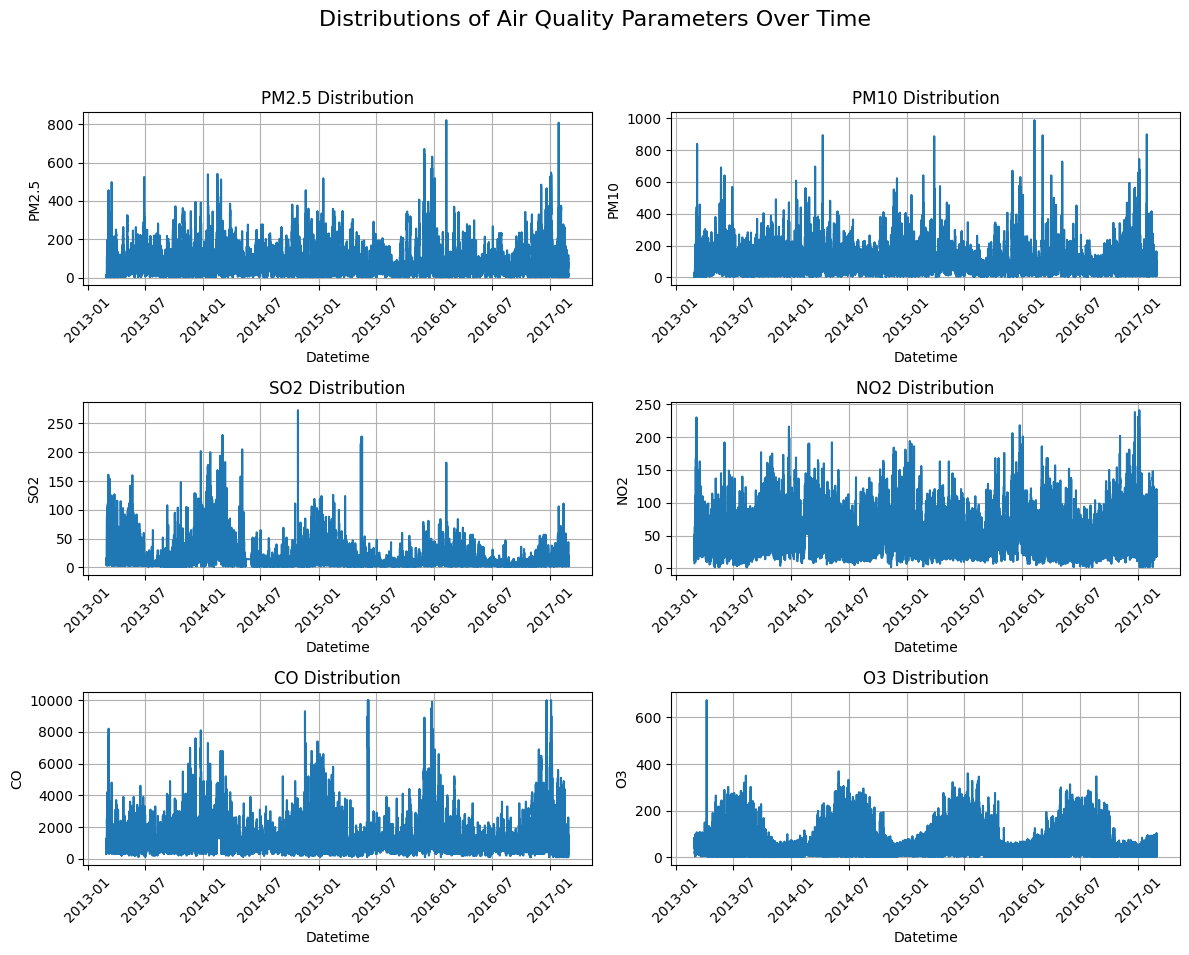

In [81]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Distributions of Air Quality Parameters Over Time', fontsize=16)

# Loop through the parameters and create subplots
for i, parameter in enumerate(parameters):
    row = i // 2  # Row index (0, 0, 1, 1, 2, 2)
    col = i % 2   # Column index (0, 1, 0, 1, 0, 1)

    # Plot the distribution of the parameter
    axes[row, col].plot(tiantan_df['datetime'], tiantan_df[parameter], linestyle='-')
    axes[row, col].set_title(f'{parameter} Distribution')
    axes[row, col].set_xlabel('Datetime')
    axes[row, col].set_ylabel(parameter)
    axes[row, col].grid(True)
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the subplots
plt.show()

Dari distribusi parameter kualitas udara dari waktu ke waktu:

1. PM2.5, PM10, SO2, dan CO cenderung lebih tinggi pada bulan-bulan musim dingin (misalnya, November hingga Februari) dibandingkan dengan bulan-bulan lainnya dalam setahun. Hal ini menunjukkan bahwa polusi udara, khususnya partikel dan gas tertentu, cenderung lebih buruk selama bulan-bulan yang lebih dingin.

2. Tingkat O3 (Ozon) mencapai puncaknya selama bulan-bulan musim panas (misalnya, Juni hingga Agustus), yang menunjukkan variasi musiman dalam konsentrasi ozon.

3. Variasi musiman dalam suhu diperkirakan terjadi dan berkontribusi pada pola yang diamati dalam konsentrasi polutan.

4. Curah hujan tidak memiliki pengaruh yang signifikan terhadap kualitas udara selama sebagian besar tahun.

5. Kecepatan angin tidak menunjukkan pola musiman yang kuat.

6. Polutan seperti PM2.5, PM10, SO2, NO2, dan CO menunjukkan variasi konsentrasi sepanjang tahun, yang mungkin dipengaruhi oleh faktor-faktor seperti kondisi cuaca, emisi, dan aktivitas manusia.

7. Polutan tertentu (misalnya, PM2.5, PM10) cenderung menurun saat suhu meningkat.

### Pertanyaan 4: Apakah kondisi polusi udara di kota tiandi terjadi karena terbawa oleh arus angin?

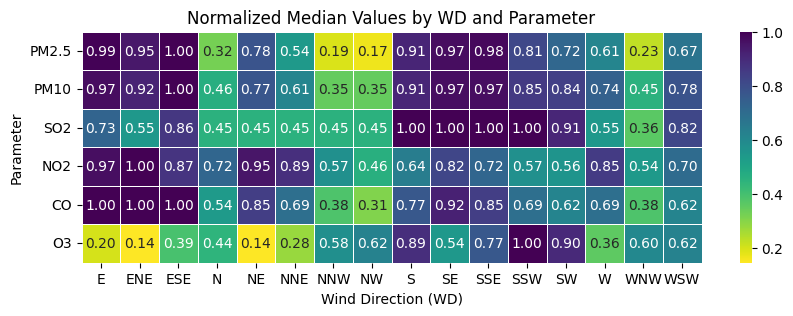

In [59]:
# Define the air quality parameters
parameters = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Calculate the median for each parameter by 'wd' (wind direction)
wd_table = tiantan_df[parameters].groupby(tiantan_df['wd']).median()

# Normalize each column to its maximum value
normalized_wd_table = wd_table / wd_table.max()

# Create a heatmap with the transposed data
plt.figure(figsize=(10, 3))
sns.heatmap(normalized_wd_table.T, cmap=plt.cm.viridis_r, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Normalized Median Values by WD and Parameter")
plt.xlabel("Wind Direction (WD)")
plt.ylabel("Parameter")
plt.show()

Peta panas yang menyediakan nilai median berbagai parameter menurut arah angin. Untuk memberi wawasan identifikasi sumber polusi udaha PM2.5 dan PM10 melalui udara.

1. PM2.5 dan PM10 cenderung lebih tinggi untuk arah angin dari timur (E, ENE, ESE), tenggara (S, SE, SSE, SSW, SW). SO2 potensi terbesar dari arah angin selatan (S, SE, SSE, SSW, SW). NO2 potensi terbesar dari arah angin timur (E, ENE, ESE) dan Utara (NE, NNE). CO potensi terbesar dari arah angin timur (E, ENE, ESE) dan selatan (SE, SSE). Hal tersebut menunjukkan bahwa besar kecil polutan yang terjadi dapat disebabkan oleh angin.

2. Sedangkan, Kadar O3 lebih tinggi berasal dari arah angin dari selatan (S, SSE, SSW, SW). Hal tersebut menunjukkan sumber polusi dari penipisan ozon di daerah selatan.

Secara keseluruhan, peta panas ini memberikan ringkasan parameter polusi lingkungan dapat berhubungan dengan arah angin. Hal tersebut berguna untuk memahami pola kualitas udara di tiantan dan mengidentifikasi sumber potensi polusi berdasarkan pola angin yang terjadi.

## Conclusion

Polusi pada kota Tiantan masih tinggi dari tahun ke tahun. Polusi tersebut dapat membahayakan kesehatan paru-paru dan lingkungan sekitarnya.

In [60]:
tiantan_df.to_csv("all_data.csv", index=False)